In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
print(tf.__version__)

2.3.0


In [3]:
fashion_dataset=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_dataset.load_data()

In [4]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [6]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
test_labels[0]

9

In [8]:
class_labels=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag"]
j=1
for i in class_labels:
    print(j,"->",i)
    j+=1

1 -> T-shirt/Top
2 -> Trouser
3 -> Pullover
4 -> Dress
5 -> Coat
6 -> Sandal
7 -> Shirt
8 -> Sneaker
9 -> Bag


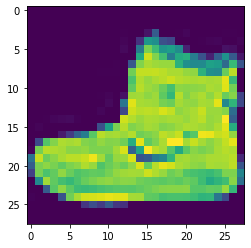

In [9]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.imshow(train_images[0])

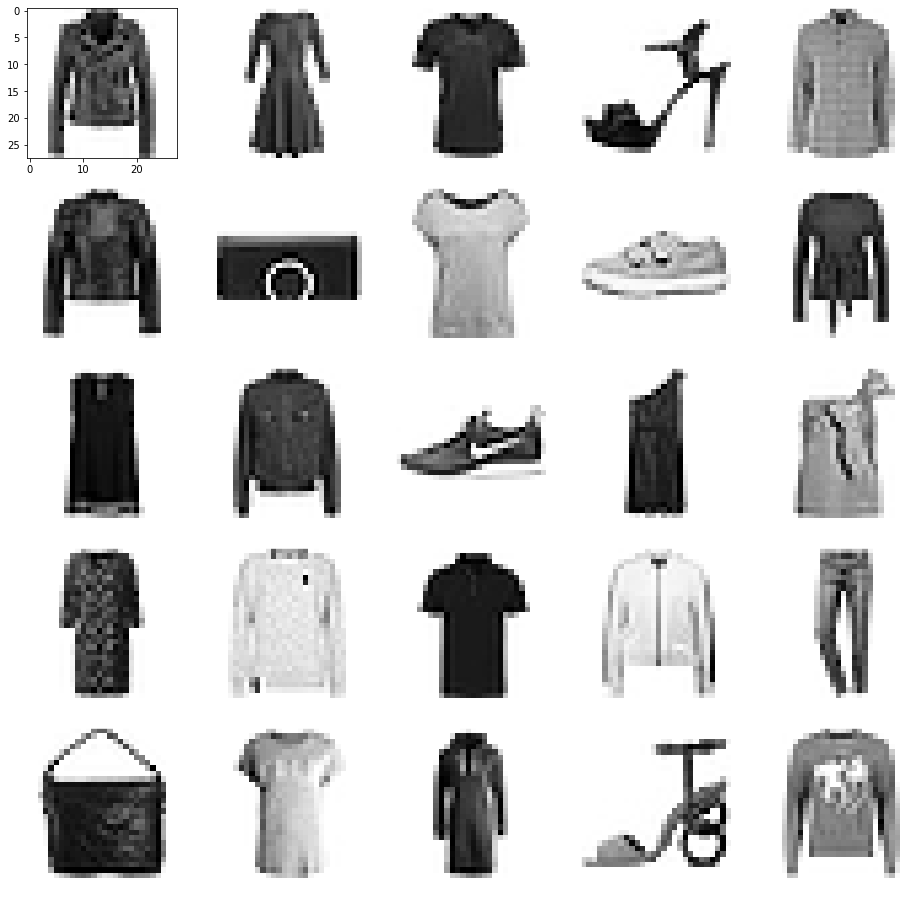

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(1,1000,25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(train_images[i],cmap="Greys")
    plt.style.use('dark_background')

In [11]:
train_images.ndim

3

In [12]:
train_images=np.expand_dims(train_images,-1)
test_images=np.expand_dims(test_images,-1)

In [13]:
train_images.ndim

4

In [14]:
train_images=train_images/255
test_images=test_images/255

In [15]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [16]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels=train_test_split(
    train_images, train_labels, test_size=0.2, random_state=2020)

In [17]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3, strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(train_images,train_labels,epochs=10,batch_size=512,verbose=1,validation_data=(val_images,val_labels))

Epoch 1/10
94/94 [==============================] - 10s 104ms/step - loss: 0.6105 - accuracy: 0.7978 - val_loss: 0.4139 - val_accuracy: 0.8548
Epoch 2/10
94/94 [==============================] - 10s 102ms/step - loss: 0.3606 - accuracy: 0.8729 - val_loss: 0.3403 - val_accuracy: 0.8834
Epoch 3/10
94/94 [==============================] - 12s 126ms/step - loss: 0.3121 - accuracy: 0.8892 - val_loss: 0.3325 - val_accuracy: 0.8857
Epoch 4/10
94/94 [==============================] - 11s 115ms/step - loss: 0.2861 - accuracy: 0.8983 - val_loss: 0.3040 - val_accuracy: 0.8932
Epoch 5/10
94/94 [==============================] - 10s 108ms/step - loss: 0.2630 - accuracy: 0.9059 - val_loss: 0.2900 - val_accuracy: 0.8982
Epoch 6/10
94/94 [==============================] - 10s 109ms/step - loss: 0.2577 - accuracy: 0.9065 - val_loss: 0.2831 - val_accuracy: 0.8992
Epoch 7/10
94/94 [==============================] - 10s 109ms/step - loss: 0.2360 - accuracy: 0.9154 - val_loss: 0.2839 - val_accuracy: 0.9009

In [21]:
model.predict(np.expand_dims(test_images[0],axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98]],
      dtype=float32)

In [22]:
np.argmax(model.predict(np.expand_dims(test_images[0],axis=0)).round(2))

9

In [23]:
test_labels[0]

9

In [24]:
label_pred=model.predict(train_images).round(2)

In [25]:
label_pred

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ]], dtype=float32)

In [26]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2705 - accuracy: 0.9027


[0.2704973518848419, 0.9027000069618225]